# Quickstart: Parsing and Plotting
This example shows the most basic steps to get from a raw BioLector data file to an interactive visualization.

In [1]:
import pandas
import ipywidgets
from matplotlib import pyplot, cm

import bletl
# To get support for parsing BioLector II/Pro files, you just need
# to import the `bletl_pro` package. It functions as a parser plugin.
import bletl_pro

import bletl_analysis

In 98 % of the cases, you will use the `bletl.parse` function to load data.

The function comes with a few arguments that you can use to override calibration settings if your raw data file for example does not specify the correct `lot_number`.

To learn all about the different options, run `help(bletl.parse)` or `bletl.parse?`.

## Parsing
In this quickstart, we load a raw data file from the test suite:

In [2]:
bldata = bletl.parse(r'..\bletl_analysis\tests\data\107-AR_Coryne-AR-2019-04-15-12-39-30.csv')
# just display the variable containing the data
bldata

BLData(model=BLPro) {
  "BS3": FilterTimeSeries(98 cycles, 48 wells),
  "pH": FilterTimeSeries(98 cycles, 48 wells),
  "DO": FilterTimeSeries(98 cycles, 48 wells),
}

As you can see in the above, the returned `BLData` object is a dictionary that maps identifiers of filtersets to `FilterTimeSeries` objects.

## Metadata

Additional properties, such as `comments`, `environment` or `filtersets` contain data that is not specific to a well:

In [3]:
bldata.filtersets.head()

,filter_number,filter_name,filter_id,filter_type,excitation,emission,gain,gain_1,gain_2,phase_statistic_sigma,signal_quality_tolerance,reference_gain,reference_value,calibration,emission2
1,1,Biomass,201,Intensity,None,None,NaN,3.0,1.0,None,None,4.0,121.779999,,None
2,2,pH(HP8),202,pH,None,None,7.0,7.0,1.0,None,None,NaN,100.000000,1846_comp,None
3,3,DO(PSt3),203,DO,None,None,7.0,7.0,1.0,None,None,NaN,100.000000,1846_comp,None


In [4]:
bldata.environment.head()

,cycle,time,temp_setpoint,temp_up,temp_down,temp_water,o2,co2,humidity,shaker_setpoint,shaker_actual
4,1,0.0125,None,27.8,29.2,28.3,21.55,-9999.0,68.89,None,1400.0
168,2,0.2125,None,30.0,30.0,31.1,21.11,-9999.0,85.38,None,1399.0
332,3,0.4125,None,30.0,30.0,30.2,21.13,-9999.0,85.04,None,1399.0
496,4,0.6125,None,29.9,29.9,29.9,21.15,-9999.0,85.34,None,1400.0
660,5,0.8125,None,29.9,30.0,30.2,21.16,-9999.0,85.42,None,1399.0


## Accessing and Visualizing Measurements
Depending on what you want to do, you can retrieve measurement data as tuples of Numpy arrays:
+ `bldata.get_timeseries`
+ `bldata['pH'].get_timeseries`

or as pandas DataFrames:
+ `bldata.get_narrow_data`
+ `bldata.get_unified_narrow_data`
+ `bldata['pH'].get_unified_dataframe`

or via the underlying DataFrames that separate time and value:
+ `bldata['pH'].time`
+ `bldata['pH'].value`

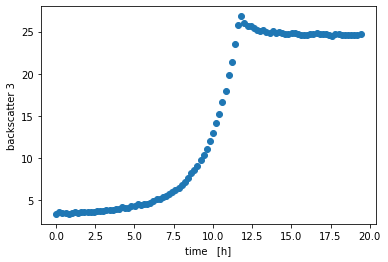

In [5]:
# here we retrieve it as numpy arrays, becase that's very convenient for plotting
t, bs = bldata.get_timeseries('BS3', 'A02')

pyplot.scatter(t, bs)
pyplot.xlabel('time   [h]')
pyplot.ylabel('backscatter 3')
pyplot.show()

### Interactivity
With the `ipywidgets` package, one can easily create interactive visualizations.

Here, the plotting code from above is wrapped into a `plot_one_well` function that takes `filterset` and `well` as arguments.

The `ipywidgets.interact` or `ipywidgets.interact_manual` function is then used to create an interactive visualization, where all the available filtersets/wells are passed as options.

In [6]:
def plot_one_well(filterset, well):
    time, value = bldata.get_timeseries(filterset, well)
    
    fig, ax = pyplot.subplots()
    ax.scatter(time, value)
    ax.set_ylabel(filterset)
    ax.set_xlabel('time   [h]')
    ax.set_title(well)
    pyplot.show()
    return

ipywidgets.interact(
    plot_one_well,
    filterset=list(bldata.keys()),
    well=list(bldata['pH'].time.columns),
);

interactive(children=(Dropdown(description='filterset', options=('BS3', 'pH', 'DO'), value='BS3'), Dropdown(de…

That's it with the basic tutorial!
To learn more about what `bletl` and its companion packages can do, checkout the other examples.

Also remember to use `help(...)` and `dir(...)` to read the attributes/methods/docstrings. They often contain more detailed information than example notebooks.